# USE MTCNN to detech face

1/1 [==============================] - 0s 54ms/step


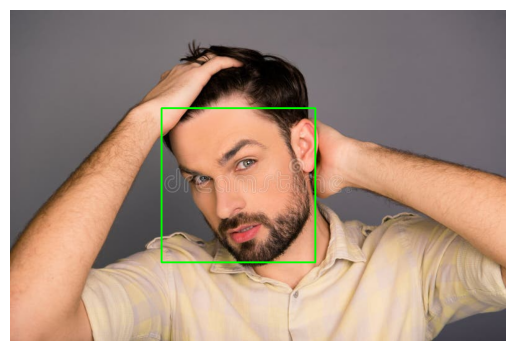

In [3]:
from mtcnn import MTCNN
import cv2
from matplotlib import pyplot as plt

def detect_faces_mtcnn(image_path):
    # Load image
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    # Initialize MTCNN detector
    detector = MTCNN()

    # Detect faces
    faces = detector.detect_faces(img)

    # Draw rectangles around faces
    res = []
    for face in faces:
        x, y, width, height = face['box']
        edge_length = max(width, height) 
        x_center = x + width // 2
        y_center = y + height // 2
        x_new = max(0, x_center - edge_length // 2)
        y_new = max(0, y_center - edge_length // 2)
        plt.imshow(cv2.rectangle(img, (x_new, y_new), (x_new + edge_length, y_new + edge_length), (0, 255, 0), 2))
        plt.axis("off")
        plt.show()
        face_square = img[y_new:y_new+height, x_new:x_new+width]
        res.append(face_square)
    return res

# Example usage
image_path = 'portrait-handsome-bearded-man-combing-hair-fingers-170177884.jpeg'
faces = detect_faces_mtcnn(image_path)


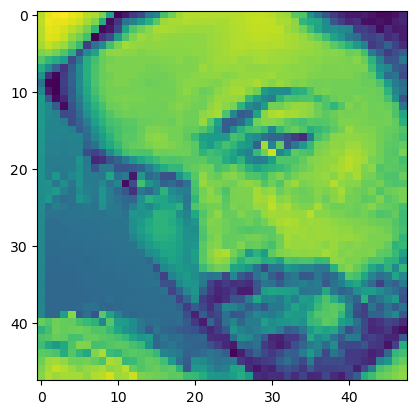

In [6]:
import cv2

def convert_to_grayscale_resize(img):
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (48, 48))
    normalized_img = resized_img / 255.0
    reshaped_img = normalized_img.reshape(48, 48, 1)

    return reshaped_img

plt.imshow(convert_to_grayscale_resize(faces[0]))


# Use UTKFace dataset to test the model

1/1 [==============================] - 0s 49ms/step


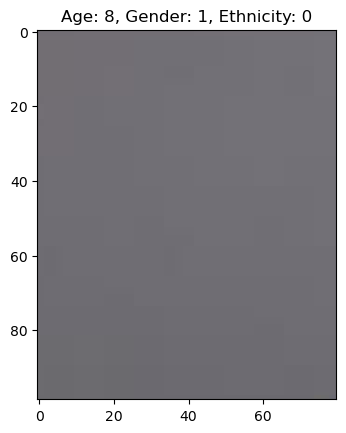

In [65]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the dataset folder
dataset_path = 'part4'

# Initialize lists to store data
ages = []
genders = []
ethnicities = []
images = []

# Iterate over each file in the dataset directory
for filename in os.listdir(dataset_path)[0:10]:
    detector = MTCNN()
    if filename.endswith(".jpg"):  # Check if the file is a JPG
        image = cv2.imread(os.path.join(dataset_path, filename))  
        
        # Detect faces
        faces = detector.detect_faces(image)
    
        # Draw rectangles round faces
        if faces:
            face = faces[0]
            x, y, width, height = face['box']
            edge_length = max(width, height) 
            x_center = x + width // 2
            y_center = y + height // 2
            x_new = max(0, x_center - edge_length // 2)
            y_new = max(0, y_center - edge_length // 2)
            #plt.imshow(cv2.rectangle(img, (x_new, y_new), (x_new + edge_length, y_new + edge_length), (0, 255, 0), 2))
            #plt.axis("off")
            #plt.show()
            face_square = img[y_new:y_new+height, x_new:x_new+width]
        
            images.append(face_square)
    
            # Extract annotations from the filename
            age, gender, ethnicity = filename.split('_')[:3]
            ages.append(int(age))
            genders.append(int(gender))
            ethnicities.append(int(ethnicity))

# Convert lists to numpy array
ages = np.array(ages)
genders = np.array(genders)
ethnicities = np.array(ethnicities)

# Example to display the first image and its annotations
plt.imshow(images[0])
plt.title(f'Age: {ages[0]}, Gender: {genders[0]}, Ethnicity: {ethnicities[0]}')
plt.show()


1/1 [==============================] - 0s 50ms/step


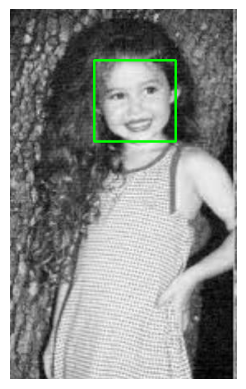

1/1 [==============================] - 0s 10ms/step


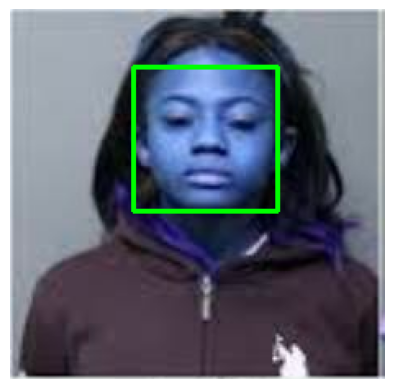

1/1 [==============================] - 0s 10ms/step


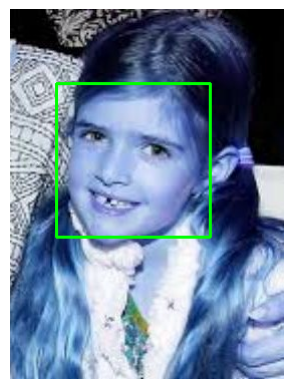

1/1 [==============================] - 0s 9ms/step


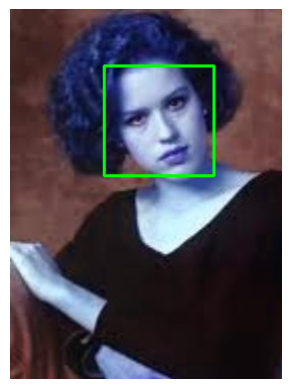

1/1 [==============================] - 0s 10ms/step


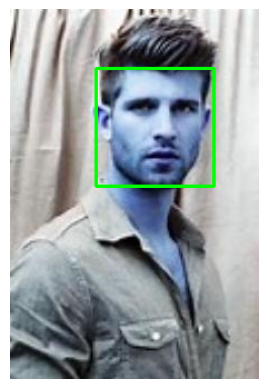

1/1 [==============================] - 0s 9ms/step


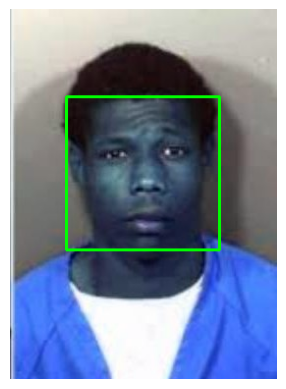

1/1 [==============================] - 0s 8ms/step


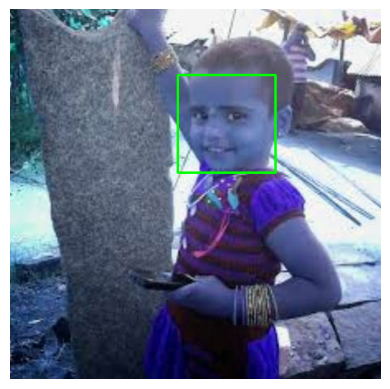

1/1 [==============================] - 0s 9ms/step


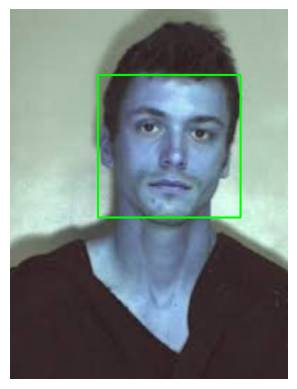

In [25]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = 'part4'
detector = MTCNN()
ages = []
genders = []
ethnicities = []
images = []
for filename in os.listdir(dataset_path)[0:10]:
    if filename.endswith(".jpg"):
        image = cv2.imread(os.path.join(dataset_path, filename))  
    faces = detector.detect_faces(image)
    if faces:
        face = faces[0]
        x, y, width, height = face['box']
        edge_length = max(width, height) 
        x_center = x + width // 2
        y_center = y + height // 2
        x_new = max(0, x_center - edge_length // 2)
        y_new = max(0, y_center - edge_length // 2)
        plt.imshow(cv2.rectangle(image, (x_new, y_new), (x_new + edge_length, y_new + edge_length), (0, 255, 0), 2))
        plt.axis("off")
        plt.show()
        face_square = image[y_new:y_new+height, x_new:x_new+width]
        face_square = cv2.cvtColor(face_square, cv2.COLOR_BGR2GRAY)
        resized_face = cv2.resize(face_square, (48, 48))
    
        images.append(resized_face)
    
        # Extract annotations from the filename
        age, gender, ethnicity = filename.split('_')[:3]
        ages.append(int(age))
        genders.append(int(gender))
        ethnicities.append(int(ethnicity))

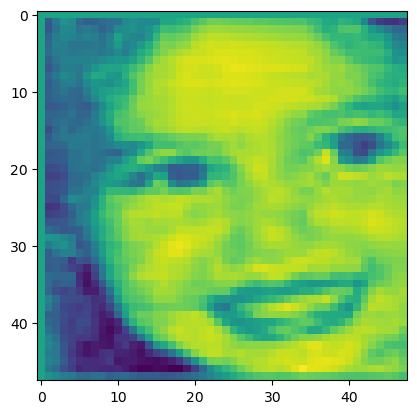

In [35]:
images = np.array(images)
images = images/255
ages = np.array(ages)
genders = np.array(genders)
ethnicities = np.array(ethnicities)
plt.imshow(images[0])

In [36]:
from tensorflow.keras.models import load_model

# Load the model from the file
model = load_model('model_best_mse.h5')

In [39]:
pred = model.predict(images)
pred

1/1 [==============================] - 0s 26ms/step


array([[-4.851231 ],
       [10.1037   ],
       [-2.2162173],
       [14.826283 ],
       [20.298653 ],
       [15.661034 ],
       [ 5.554678 ],
       [31.235003 ]], dtype=float32)

In [41]:
from sklearn.metrics import mean_squared_error

# Assuming 'predictions' is your model's output and 'ages' is the array of actual age values
# Ensure both 'predictions' and 'ages' are numpy arrays of the same shape
mse = mean_squared_error(ages, pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 53.240685076675426
